In [1]:
# Incluir las bibliotecas requeridas para la exploración de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL del archivo CSV público en S3
url = 'https://diabetes-dvcstore.s3.us-east-1.amazonaws.com/files/md5/0c/84b09d240b72e8180bceff3965d1bd'
# Carga el archivo directamente en un DataFrame de pandas
df = pd.read_csv(url)
 
# Verifica el DataFrame cargado
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Descripción del tipo de dato en cada columna y determinación de valores nulos en acada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Descripción de las principales estadísticas para variables numéricas
df[["BMI", "MentHlth", "PhysHlth"]].describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


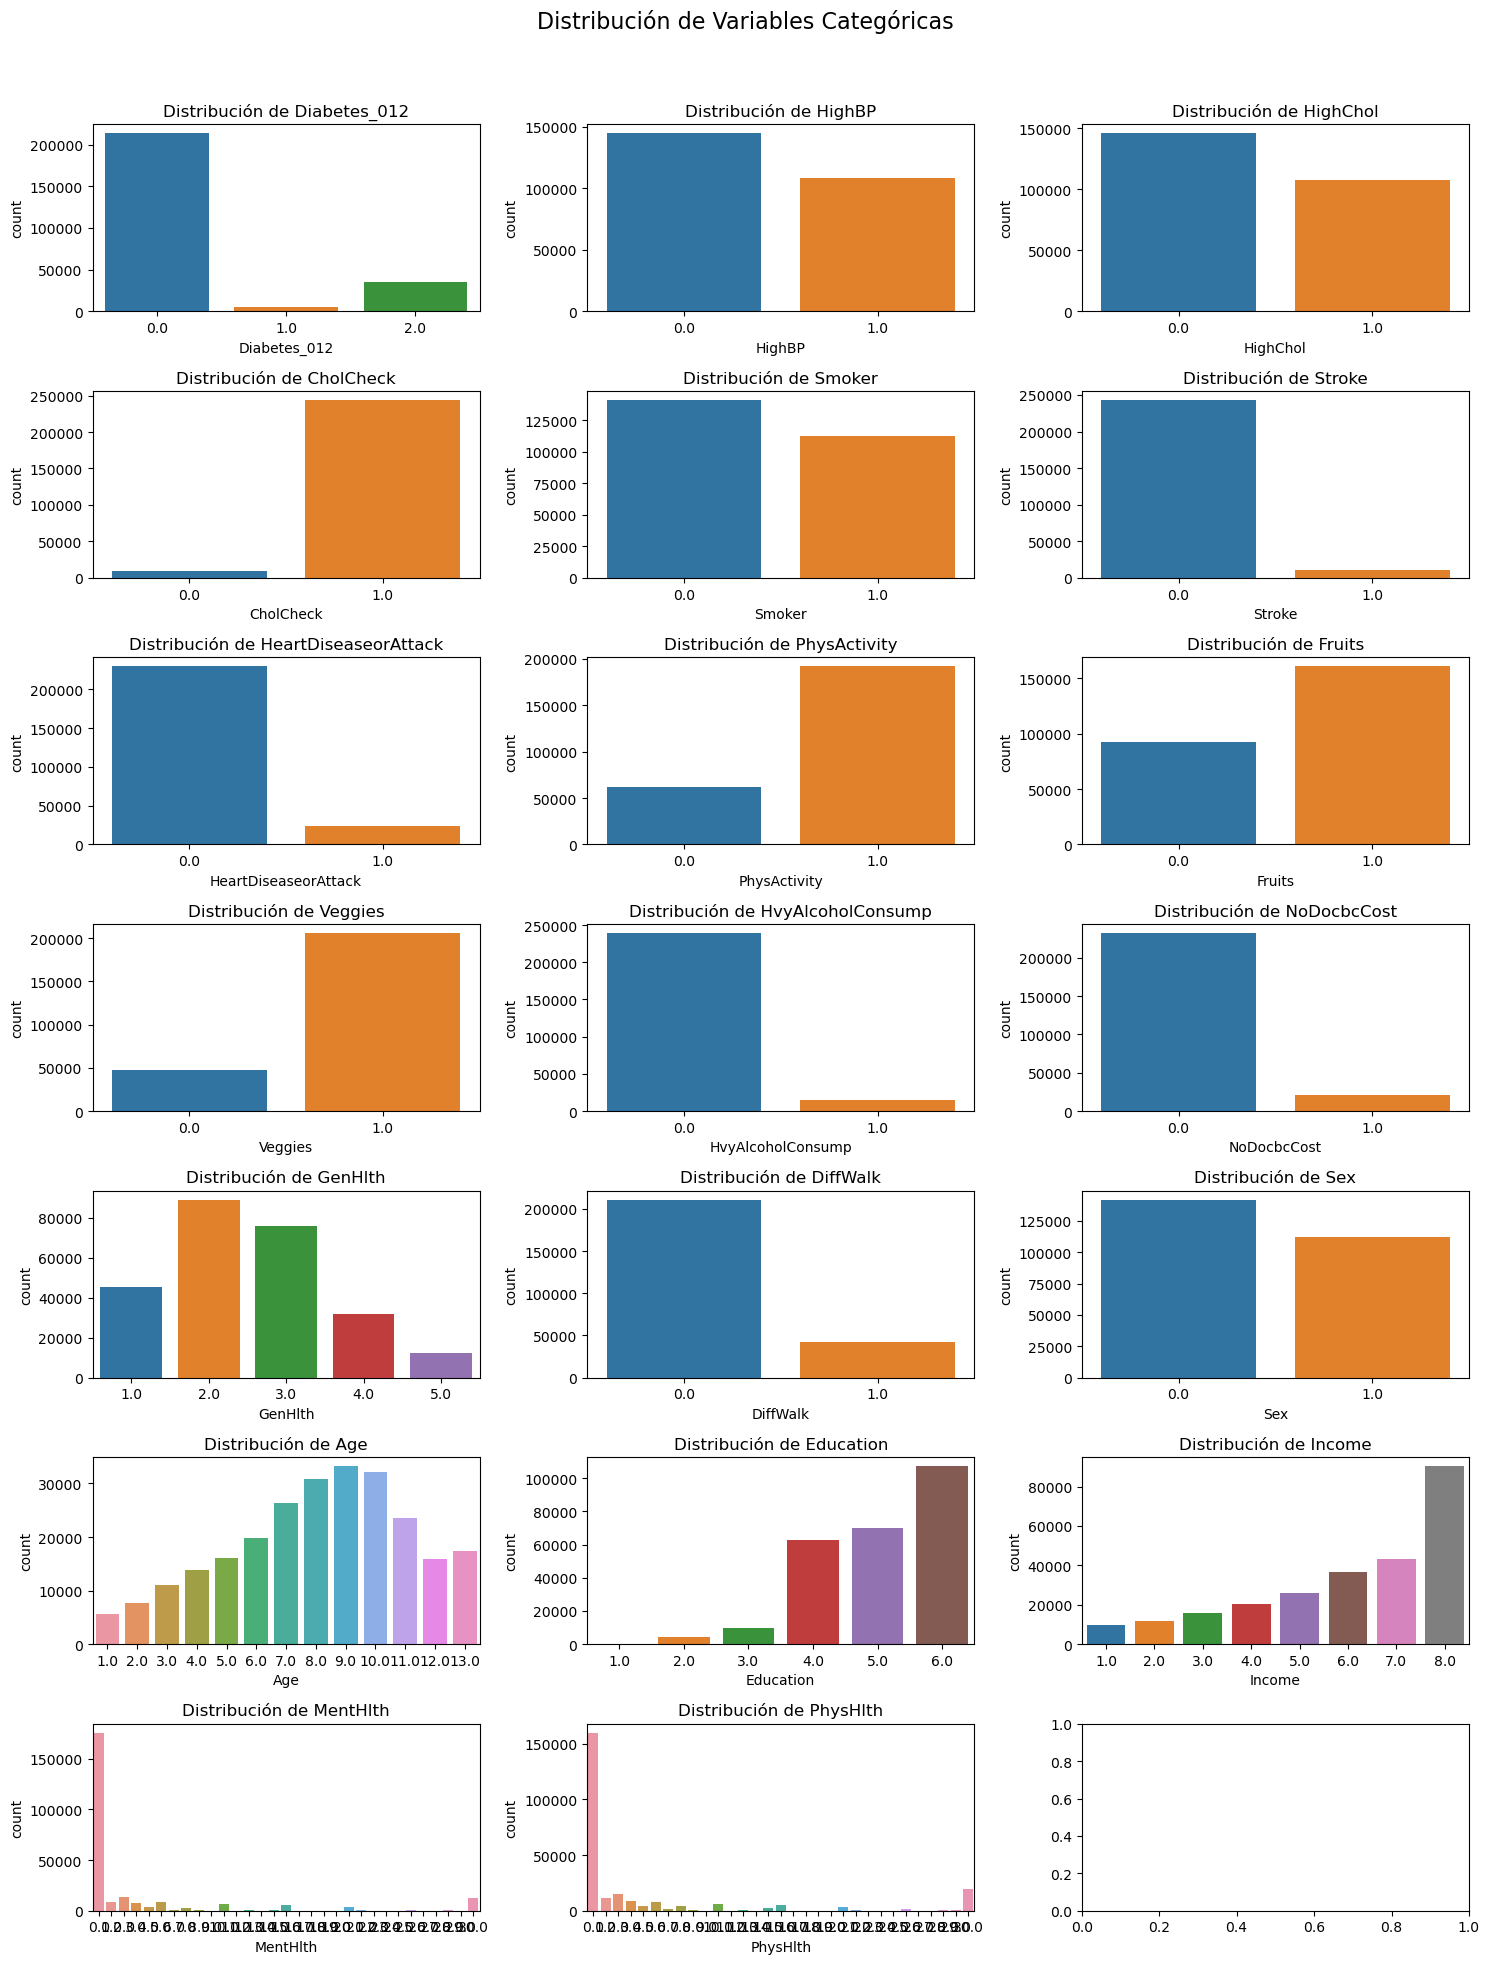

In [5]:
# Frecuencia de categorías de las variables categóricas

categorical_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'DiffWalk',
                   'Sex', 'Age', 'Education', 'Income', 'MentHlth', 'PhysHlth']

# Número de filas y columnas para el grid
n_rows = 7
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16)

# Generar los gráficos para cada variable categórica
for i, var in enumerate(categorical_vars):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(x=var, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {var}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

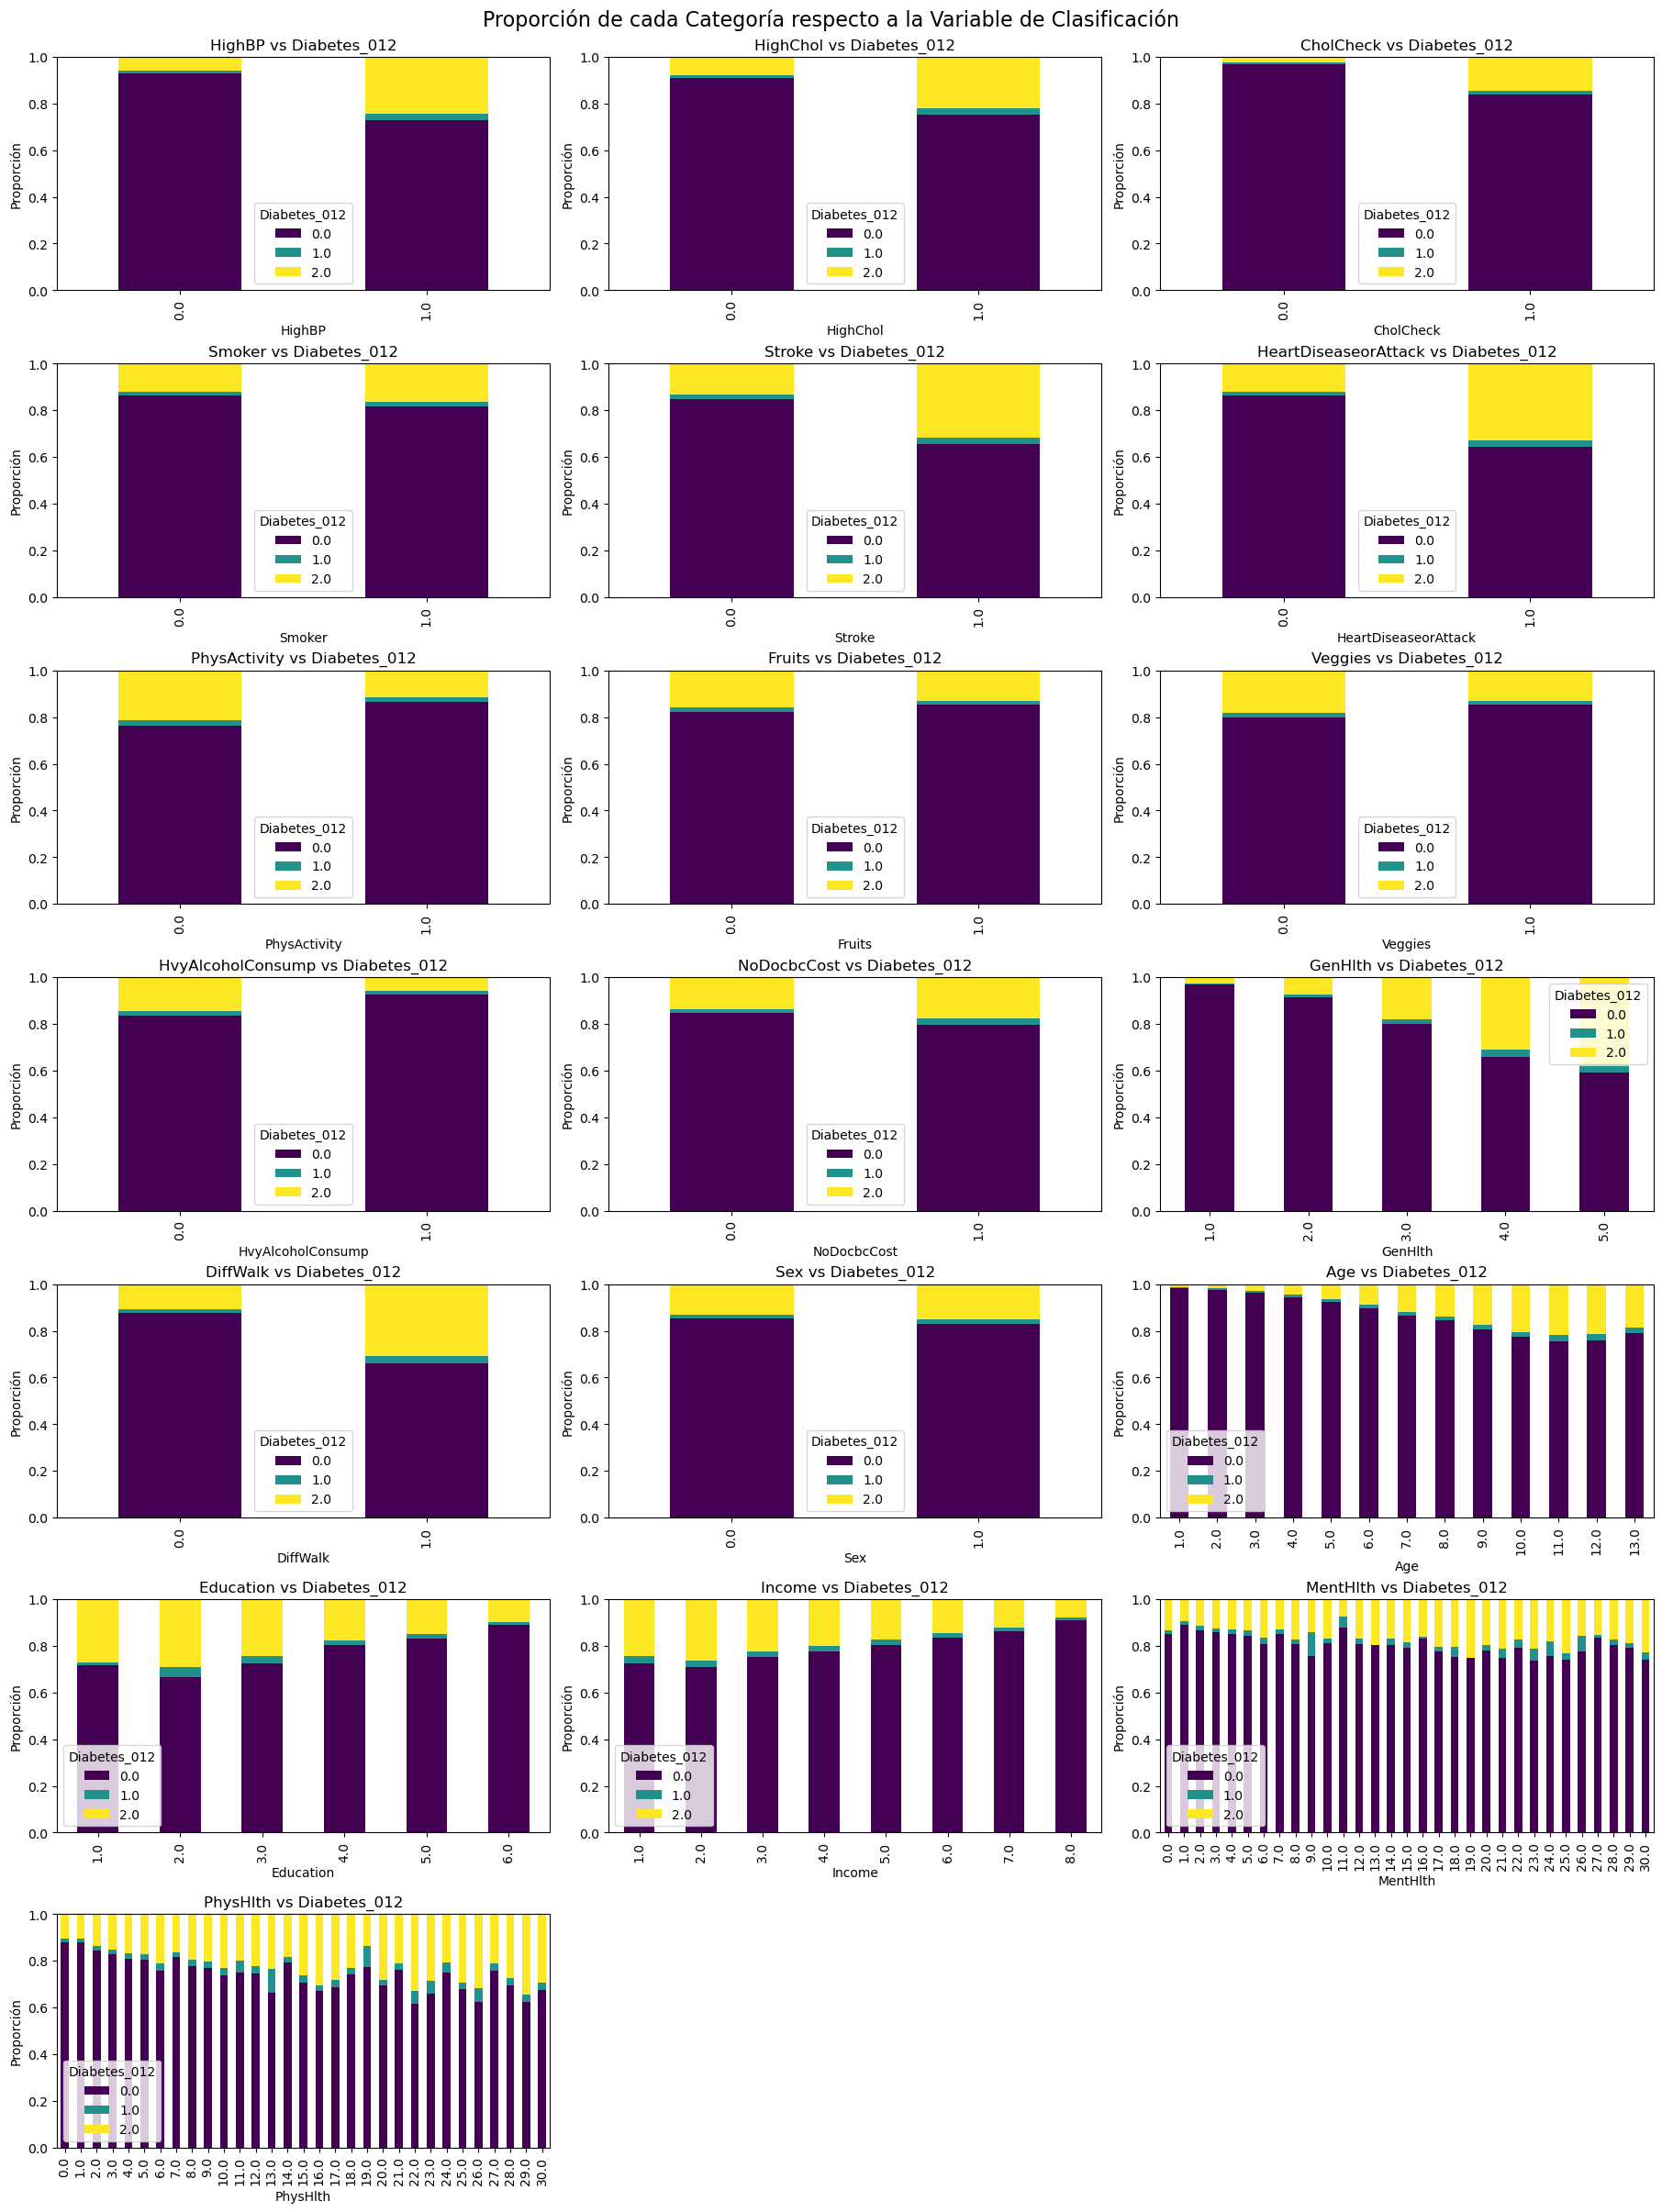

In [6]:
# Proporción de cada Categoría respecto a la Variable de Clasificación

# Variables categóricas y variable de salida
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 
                    'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'MentHlth', 'PhysHlth']
output_var = 'Diabetes_012'

# Configurar la figura para 6 filas y 3 columnas
num_rows = 7
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 24), constrained_layout=True)

# Aplanar el array de ejes para facilitar el acceso
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    if var in df.columns and output_var in df.columns:
        # Crear tabla de contingencia de proporciones
        proportions = pd.crosstab(df[var], df[output_var], normalize='index')
        proportions.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
        axes[i].set_title(f'{var} vs {output_var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Proporción')
        axes[i].set_ylim(0, 1)  # Asegura que el eje y vaya de 0 a 1

# Ocultar los ejes vacíos si hay menos de 18 variables
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')  # Ocultar ejes adicionales

plt.suptitle('Proporción de cada Categoría respecto a la Variable de Clasificación', fontsize=16)
plt.show()

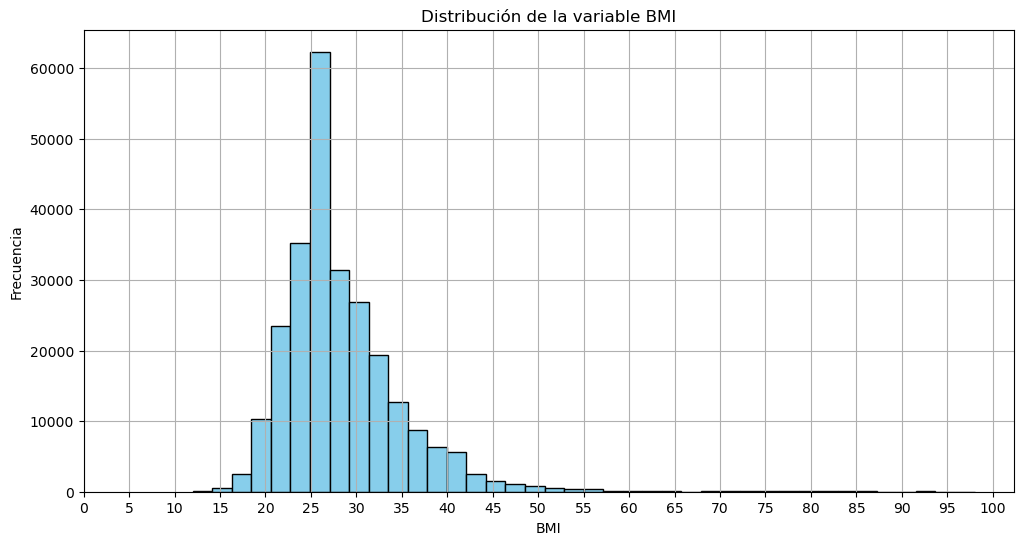

In [7]:
# Distribucíón de la variable numérica
# Configurar la figura
plt.figure(figsize=(12, 6))

# Crear el histograma para la variable 'BMI'
df['BMI'].hist(bins=40, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de la variable BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.xticks(range(0, int(df['BMI'].max()) + 5, 5))

plt.show()

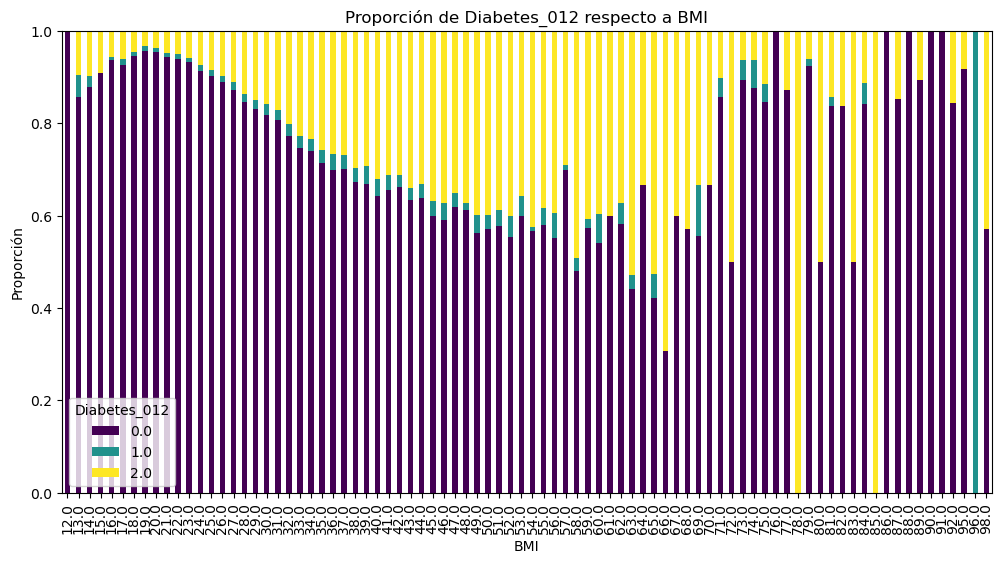

In [8]:
# Crear tabla de contingencia de proporciones para la variable 'BMI' y 'Diabetes_012'
proportions = pd.crosstab(df['BMI'], df['Diabetes_012'], normalize='index')

# Configurar la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico de barras apiladas
proportions.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Etiquetas y título
ax.set_title('Proporción de Diabetes_012 respecto a BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Proporción')
ax.set_ylim(0, 1)  # Asegura que el eje y vaya de 0 a 1

plt.show()

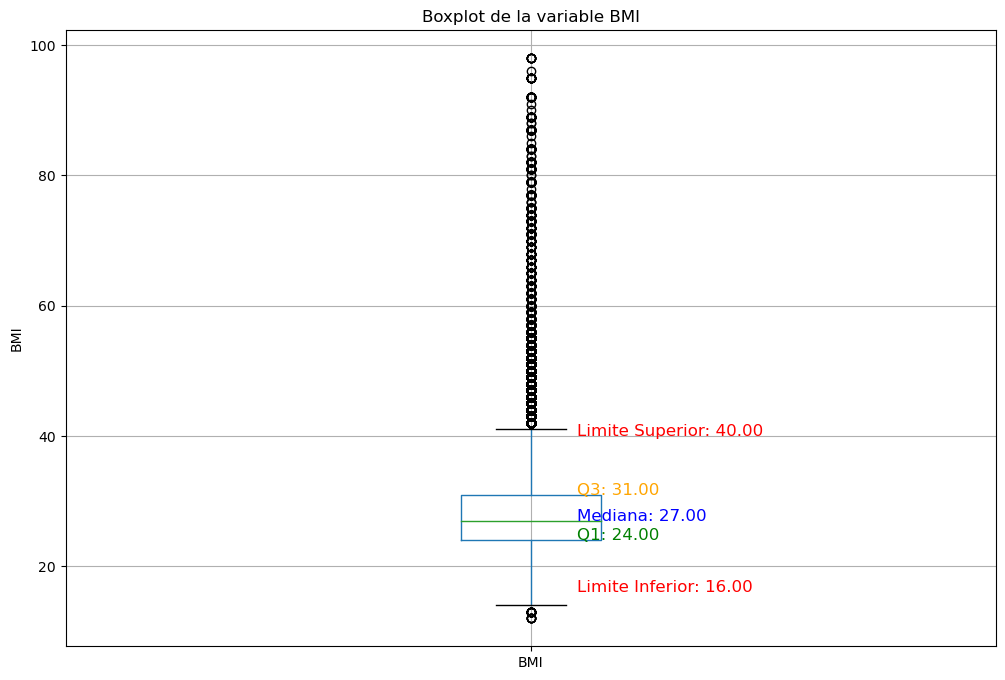

In [9]:
# Configuración de la figura
plt.figure(figsize=(12, 8))

# Crear el boxplot para la variable 'BMI'
box = df.boxplot(column='BMI', grid=True)

# Obtener datos relevantes del boxplot
mediana = df['BMI'].median()
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Calcular los límites de los bigotes
limite_inferior = 16 #q1 - 1.5 * iqr
limite_superior = 40 #q3 + 1.5 * iqr

# Añadir anotaciones a la gráfica
plt.text(1.05, mediana, f'Mediana: {mediana:.2f}', color='blue', fontsize=12)
plt.text(1.05, q1, f'Q1: {q1:.2f}', color='green', fontsize=12)
plt.text(1.05, q3, f'Q3: {q3:.2f}', color='orange', fontsize=12)
plt.text(1.05, limite_inferior, f'Limite Inferior: {limite_inferior:.2f}', color='red', fontsize=12)
plt.text(1.05, limite_superior, f'Limite Superior: {limite_superior:.2f}', color='red', fontsize=12)

# Etiquetas y título
plt.title('Boxplot de la variable BMI')
plt.ylabel('BMI')

plt.show()

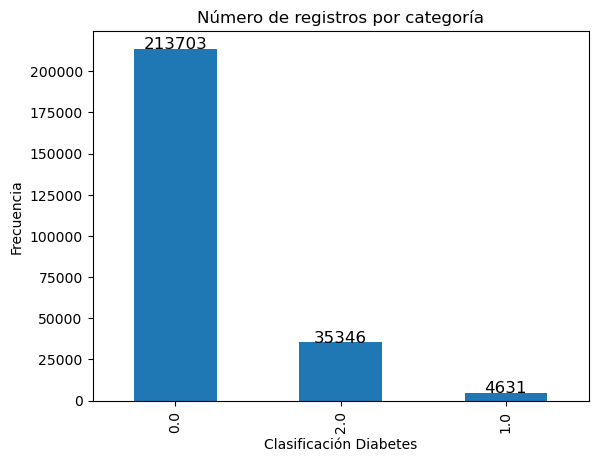

In [10]:
num_categorias = df['Diabetes_012'].value_counts()

ax = num_categorias.plot(kind='bar')

plt.title('Número de registros por categoría')
for i, valor in enumerate(num_categorias):
    ax.text(i, valor + 0.05, str(valor), ha='center', fontsize=12)
plt.xlabel('Clasificación Diabetes')
plt.ylabel('Frecuencia')

plt.show()